In [15]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
os.chdir("C:\\Users\\Amit\\")
os.getcwd()

'C:\\Users\\Amit'

In [2]:
# Import the dataset
df = pd.read_csv("Electrical_grid_data.csv")
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [3]:
# Shape of the dataset
r, c = df.shape
print('No. of rows:',r)
print('No. of columns:',c)

No. of rows: 10000
No. of columns: 14


In [4]:
# Check the missing values
df.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [5]:
# Drop the 'stad' attribute from dataset
df = df.drop(columns = ['stab'])
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


[0.10730645 0.12713144 0.13635397 0.11004883 0.03964978 0.04155612
 0.03910075 0.04291895 0.07871152 0.09459615 0.08856759 0.09405847]


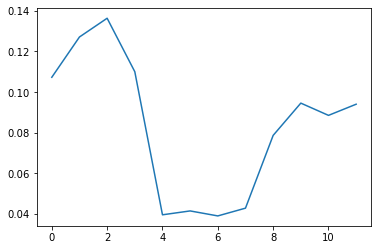

In [16]:
print(extra_tree.feature_importances_)
plt.plot(extra_tree.feature_importances_)

In [6]:
# Check the distribution of target variable 
df['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [7]:
# Set the features varibales and target variable
x = df.drop(columns = 'stabf')
y = df['stabf']

In [8]:
# Split the dataset into train(80%) and test(20%) sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [9]:
# Normalised the train and test datssets by using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalised_train_df  = scaler.fit_transform(x_train, y_train)
normalised_train_df = pd.DataFrame(normalised_train_df)
normalised_test_df = scaler.transform(x_test)
normalised_test_df = pd.DataFrame(normalised_test_df)

In [26]:
# Import RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

# fit the model on train set
rfc = RandomForestClassifier(random_state=1)
rfc.fit(x_train, y_train)

# Evaluate the model on test
y_pred = rfc.predict(x_test)

# Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print('RandomForestClassifier Accuracy: {}'.format(round(accuracy*100, 4)))

RandomForestClassifier Accuracy: 92.9


In [17]:
# Import ExtraTreesClassifier
from sklearn.tree import ExtraTreeClassifier

# fit the model on train set
extra_tree = ExtraTreeClassifier(random_state=1)
extra_tree.fit(x_train, y_train)

# Evaluate the model on test
y_pred = extra_tree.predict(x_test)

# Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print('ExtraTreeClassifier Accuracy: {}'.format(round(accuracy*100, 2)))

ExtraTreeClassifier Accuracy: 75.1


In [30]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None]
hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

n_iter_search = 10
random_search = RandomizedSearchCV(estimator=rfc, param_distributions=hyperparameter_grid,scoring='accuracy',verbose=1, n_iter=n_iter_search, n_jobs=-1, cv=5)
random_search.fit(x, y)
random_search.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


0.9208000000000001

In [31]:
random_search.best_params_

{'n_estimators': 500,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_features': 'auto'}

In [36]:
# Improved ExtraTreeClassifier
from sklearn.tree import ExtraTreeClassifier

# fit the model on train set
improved_tree = ExtraTreeClassifier(min_samples_split=3,min_samples_leaf=2,max_features='sqrt', random_state=1)
improved_tree.fit(x_train, y_train)

# Evaluate the model on test
y_pred = improved_tree.predict(x_test)

# Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print('Improved ExtraTreeClassifier Accuracy: {}'.format(round(accuracy, 4)))

Improved ExtraTreeClassifier Accuracy: 0.736


In [37]:
# Improved RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

# fit the model on train set
improved_rfc = RandomForestClassifier(n_estimators=300, min_samples_leaf=2, min_samples_split=3, max_features= 'sqrt', random_state=1)
improved_rfc.fit(x_train, y_train)

# Evaluate the model on test
y_pred = improved_rfc.predict(x_test)

# Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print('Improved RandomForestClassifier Accuracy: {}'.format(round(accuracy, 4)))

Improved RandomForestClassifier Accuracy: 0.9215


In [34]:
# Import XGboostGBM
from xgboost import XGBClassifier

# fit the model on train set
xgb = XGBClassifier(random_state=1, )
xgb.fit(x_train, y_train)

# Evaluate the model on test
y_pred = xgb.predict(x_test)

# Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print('XGBClassifier Accuracy: {}'.format(round(accuracy, 4)))

[04:15:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier Accuracy: 0.9455


In [33]:
#Import lightgbm
from lightgbm import LGBMClassifier

# fit the model on train set
lgbm = LGBMClassifier(random_state=1)
lgbm.fit(x_train, y_train)

# Evaluate the model on test
y_pred = lgbm.predict(x_test)

# Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print('LGBMClassifier Accuracy: {}'.format(round(accuracy, 4)))

LGBMClassifier Accuracy: 0.939
